<a href="https://colab.research.google.com/github/ANUPRIYAR/Autoencoders/blob/main/Simple_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [13]:
(x_train,_), (x_test,_)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# Normalize values between 0 and 1 and flatten 28*28 image into 784 

In [17]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
image_vector_size = 28*28
x_train= x_train.reshape(x_train.shape[0], image_vector_size)
x_test= x_test.reshape(x_test.shape[0], image_vector_size)

In [18]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

# **Design Autoencoder**

In [10]:
encoding_dimension=32
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)

encoded_input= keras.Input(shape=(encoding_dimension,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3842 - val_loss: 0.1868
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1775 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1484 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1316 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1203 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1129 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1074 - val_loss: 0.1034
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1036 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1007 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0982 - val_loss: 0.0960

# **Predict_images through encoder and decoder model**

In [22]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

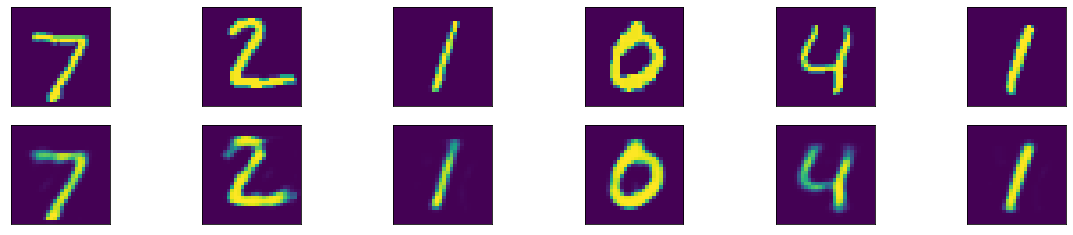

In [38]:
plt.figure(figsize=(20,4))

n= 6
for i in range(n):
  ax = plt.subplot(2,n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()